## Project -

Objective: Customer Segmentation
    
Customer Segmentation is the process of division of customer base into several
groups of individuals that share a similarity in different ways that are relevant to
marketing such as gender, age, interests, and miscellaneous spending habits.

We will perform K-means Clustering which will create different clusters to group similar spending activity based on their age and annual income. 
KMeans Clustering selects random values from the data and forms clusters assigned. The closest values are based on Euclidean Distance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df=df.drop('CustomerID',axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [6]:
df=df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
df

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


<AxesSubplot:>

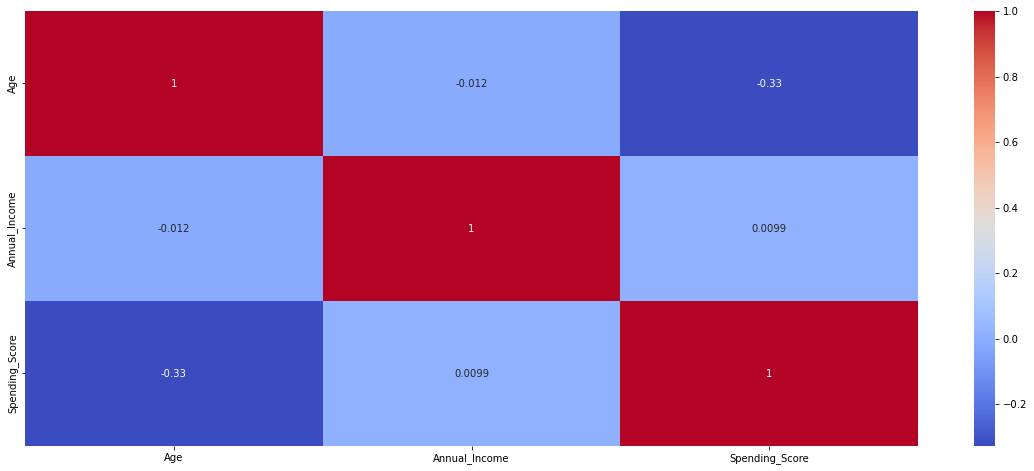

In [7]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [8]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Spending_Score'>

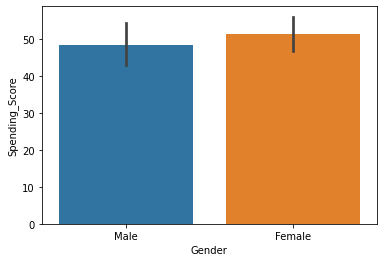

In [9]:
sns.barplot(x='Gender',y='Spending_Score',data=df)

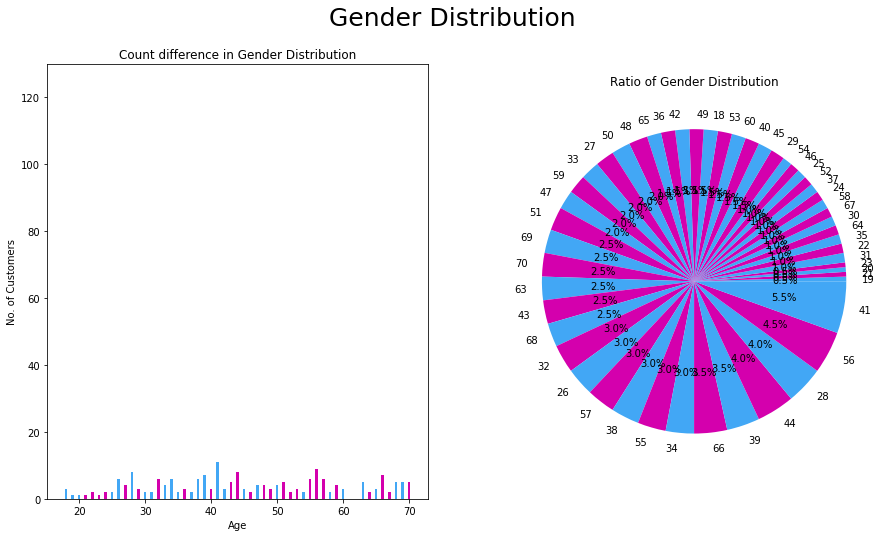

In [10]:
labels= df['Age'].unique()
values=df['Age'].value_counts(ascending=True)

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels,height=values,width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Age',ylabel='No. of Customers')
ax0.set_ylim(0,130)
#ax0.legend()

ax1.pie(values,labels=labels,colors=['#42a7f5','#d400ad'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution',fontsize=25)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

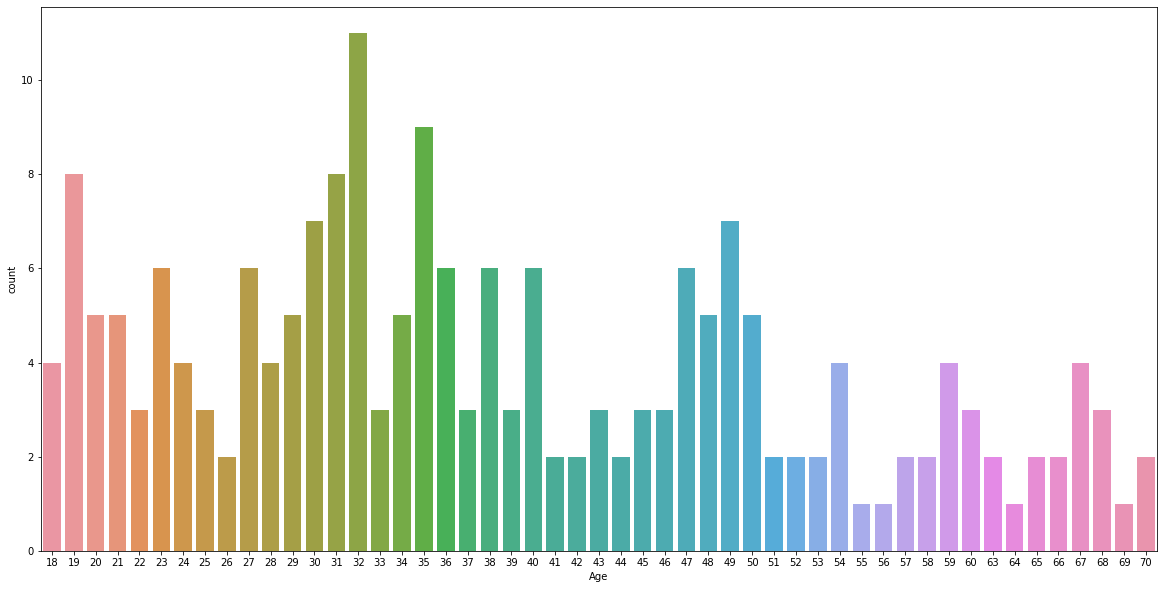

In [11]:
plt.figure(figsize=(20,10))

sns.countplot(x='Age',data=df)

In [12]:
m=df[df['Gender']=='Male']['Age']
m.describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

In [13]:
n=df[df['Gender']=='Female']['Age']
n.describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Age'>

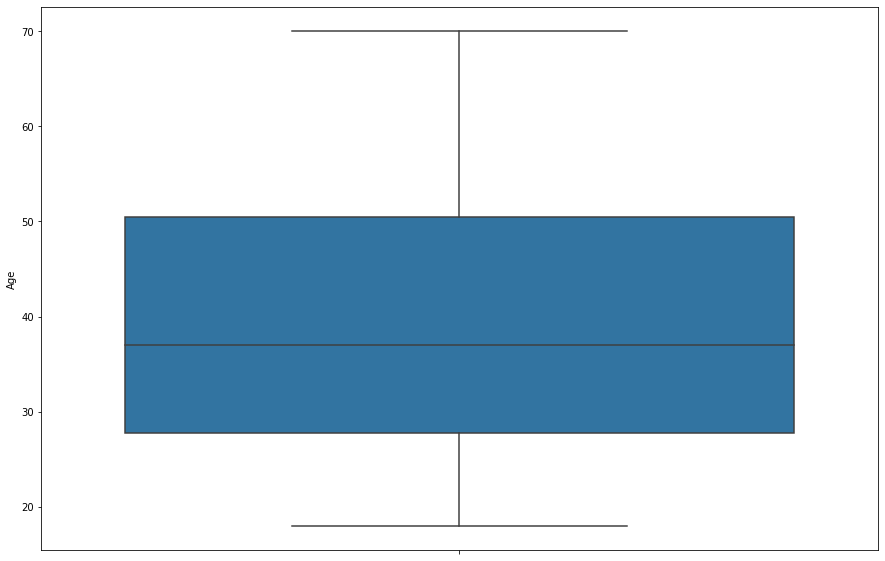

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(y=m)

<AxesSubplot:ylabel='Age'>

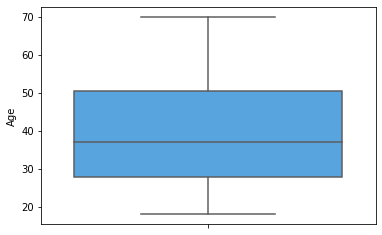

In [15]:
sns.boxplot(y=df[df['Gender']=='Male']['Age'], color="#42a7f5")

In [16]:
df['Annual_Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

<AxesSubplot:xlabel='Annual_Income', ylabel='Count'>

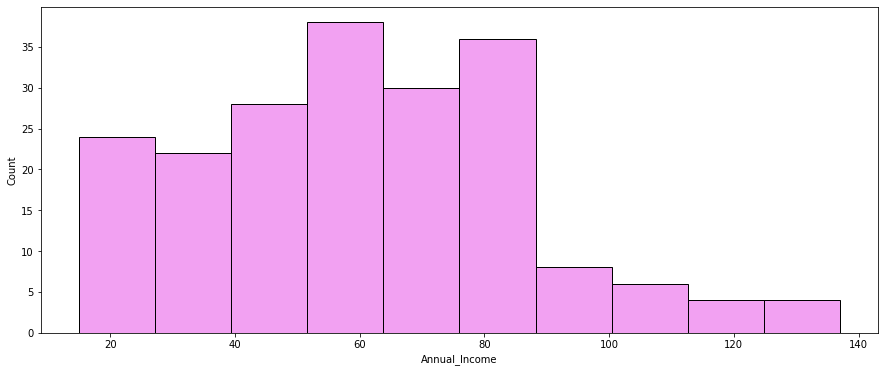

In [17]:
plt.figure(figsize=(15,6))
sns.histplot(df['Annual_Income'],color='violet')

In [18]:
df['Spending_Score'].value_counts().head()

42    8
55    7
46    6
73    6
35    5
Name: Spending_Score, dtype: int64

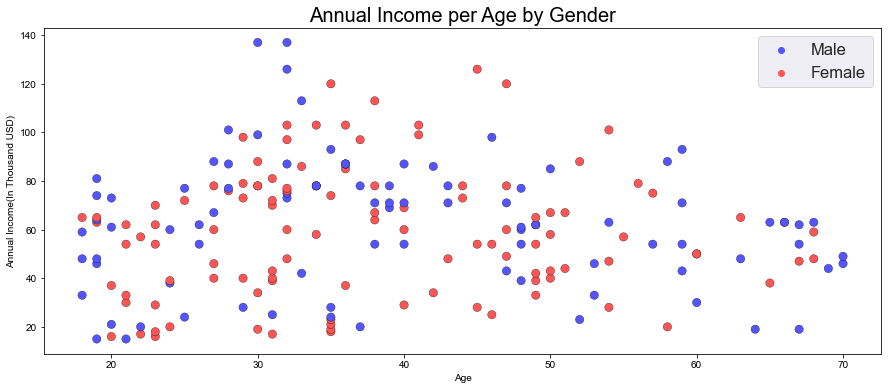

In [19]:
fig, ax=plt.subplots(figsize=(15,6))
sns.set(font_scale=1.5)
ax=sns.scatterplot(x=df['Age'],y=df['Annual_Income'],hue=df['Gender'] ,palette='seismic', s=70, edgecolor='black',linewidth=0.3)
ax.set_ylabel('Annual Income(In Thousand USD)')
ax.legend(loc='upper right')
plt.title('Annual Income per Age by Gender', fontsize=20)
plt.show()

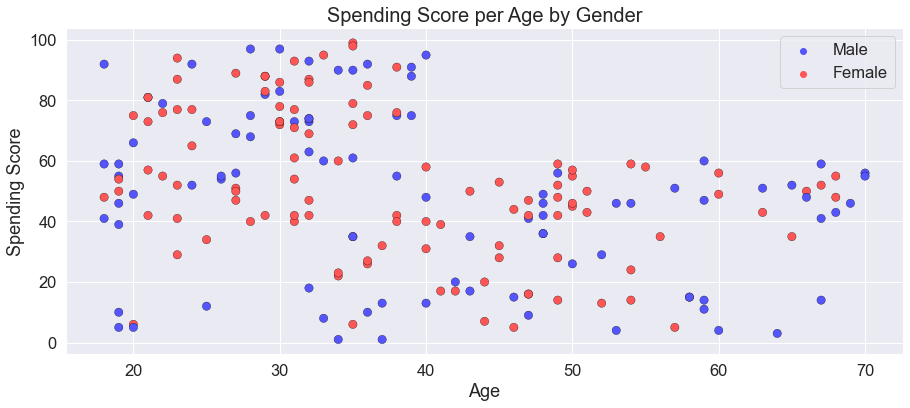

In [20]:
fig, ax=plt.subplots(figsize=(15,6))
sns.set(font_scale=1.5)
ax=sns.scatterplot(x=df['Age'],y=df['Spending_Score'],hue=df['Gender'] ,palette='seismic', s=70, edgecolor='black',linewidth=0.3)
ax.set_ylabel('Spending Score')
ax.legend(loc='upper right')
plt.title('Spending Score per Age by Gender', fontsize=20)
plt.show()

In [21]:
cluster_data=df.iloc[:,[2,3]]
cluster_data

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


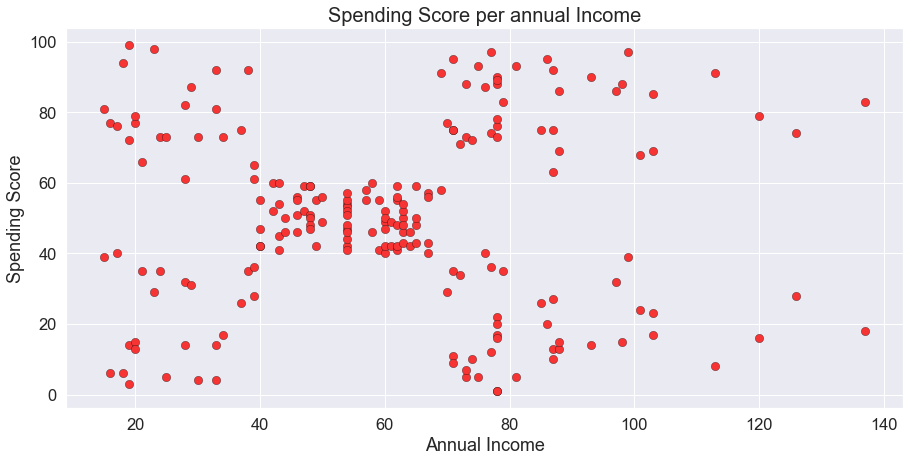

In [22]:
fig, ax=plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax=sns.scatterplot(y=cluster_data['Spending_Score'] ,x=cluster_data['Annual_Income'], s=70, color='#f73434', edgecolor='black',linewidth=0.3)
ax.set_ylabel('Spending Score')
ax.set_xlabel('Annual Income')
plt.title('Spending Score per annual Income', fontsize=20)
plt.show()

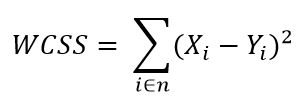

Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the above formula

In [23]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)              #kmeans uses the Euclidean Formula for calculation
    km.fit(cluster_data)        #Fitting the km model with cluster data
    wcss.append(km.inertia_)    #inertia check how highly coherent the 1st value is with 2nd value. 
np.array(wcss)

#With this simple line of code we get all the inertia value or the within the cluster sum of square.

#Inertia is a measure of how internally coherent clusters are

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37233.81451071,  30227.60651315,  24990.4343104 ,
        21830.04197805,  19653.38360625,  17869.18217518,  15830.57522323,
        14750.16338561,  13128.0280837 ,  12289.61428457,  11395.24724954,
        10377.6567954 ,   9558.07854028,   8637.44981709,   8239.67104334,
         7587.77041847,   7265.42070707,   6810.55820291,   6285.24822974,
         6056.51202168,   5665.5012854 ,   5384.96584804,   5043.42529709,
         5023.50844156])

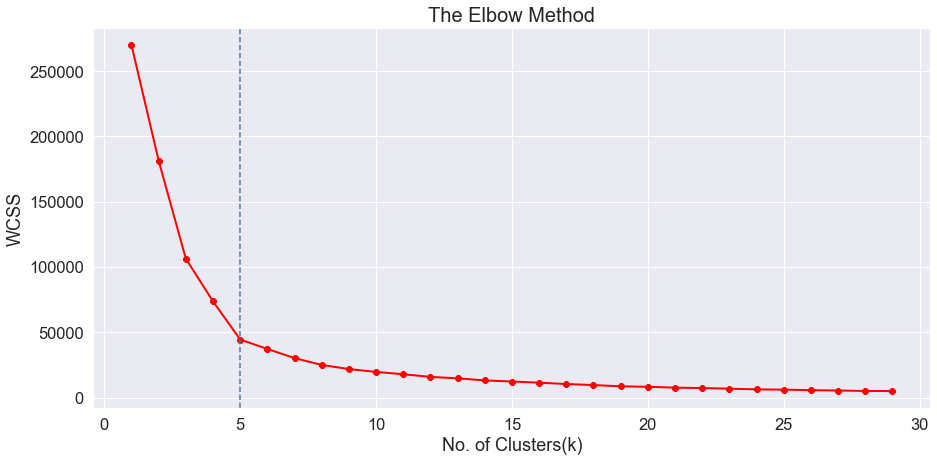

In [24]:
#Visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

fig, ax=plt.subplots(figsize=(15,7))
ax=plt.plot(range(1,30),wcss,linewidth=2, color='red', marker="8")
plt.axvline(x=5, ls='--')  #axis vertical line
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters(k)')
plt.title('The Elbow Method', fontsize=20)
plt.show()

In [25]:
#Now we have the clusters created, we will enter them into a different column

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(cluster_data)

KMeans(n_clusters=5)

In [26]:
clusters = cluster_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(cluster_data)
clusters.head()

,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


In [27]:
#We can also get the centroids of the clusters by the cluster_centers_ attribute of KMeans algorithm.

kms.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

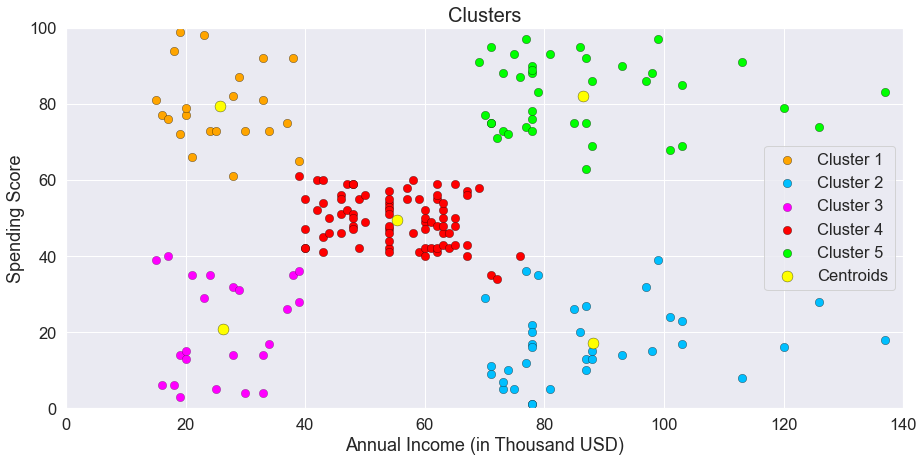

In [28]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()